In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.transforms.functional import  rotate, vflip, hflip
from torchvision.transforms import Compose, ToTensor, RandomHorizontalFlip, RandomVerticalFlip, RandomRotation, ToPILImage, Normalize
from torchvision import transforms
from sklearn.model_selection import train_test_split
import numpy as np
import torch.nn as nn
Images = np.load('./X.npy')
labels = np.load('./y.npy')
X=  torch.as_tensor(Images/255.0).float()
y=  torch.as_tensor(labels).long()

In [17]:
y.shape

torch.Size([300])

In [5]:
from torch.utils.data import Dataset
class TransformedTensorDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x
        self.y = y
        self.transform = transform
    
    def __getitem__(self, index):
        x = self.x[index]
 
        if self.transform:
            x = self.transform(x)
 
        return x, self.y[index]

    def __len__(self):
        return len(self.x)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
transform = Normalize(mean=(.5,), std=(.5,))
train_dataset = TransformedTensorDataset(X_train, y_train, transform=transform)
val_dataset = TransformedTensorDataset(X_test, y_test, transform=transform)

In [14]:
import torch.optim as optim
from Lec7sbs import StepByStep
from torch.utils.data import TensorDataset, DataLoader
# Generate loaders
def CNNModel(num_filters: int, filter_size: int, padding: int):
    cnn_model = nn.Sequential()
    cnn_model.add_module('conv_1', nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=filter_size, padding=padding))
    cnn_model.add_module('relu_1', nn.ReLU())
    cnn_model.add_module('maxpool_1', nn.MaxPool2d(kernel_size=2))
    cnn_model.add_module('flatten', nn.Flatten())
    cnn_model.add_module('lin_1', nn.Linear(9*9, 3))
    return cnn_model
cnn_model = CNNModel(1,2, 0)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=10, shuffle=True)
lr = 1e-2
optimizer = optim.SGD(cnn_model.parameters(), lr=lr)
# Defines a BCE without logits loss function (uses probabilities)
n_epochs = 100
loss_fn =nn.CrossEntropyLoss(reduction='mean')

In [8]:
sum([p.numel() for p in cnn_model.parameters() if p.requires_grad])

251

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

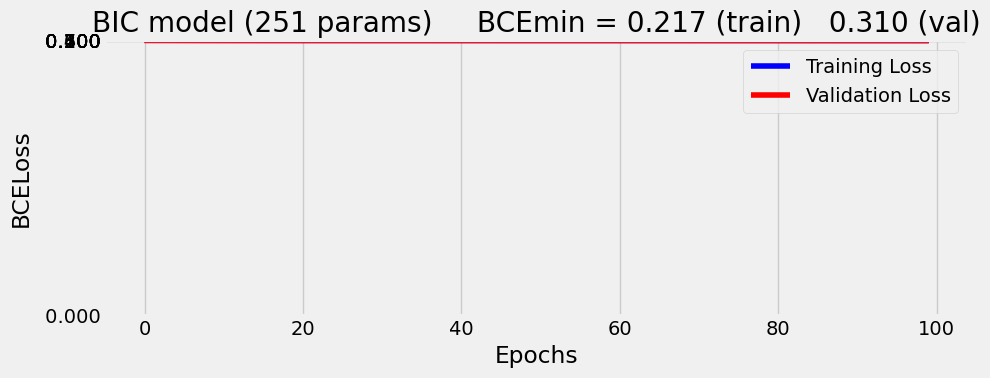

In [15]:
bc_sbs=StepByStep(cnn_model, loss_fn, optimizer)
bc_sbs.set_loaders(train_loader, test_loader)
bc_sbs.train(n_epochs)
fig=bc_sbs.PlotLossesWithInfo('BIC model')

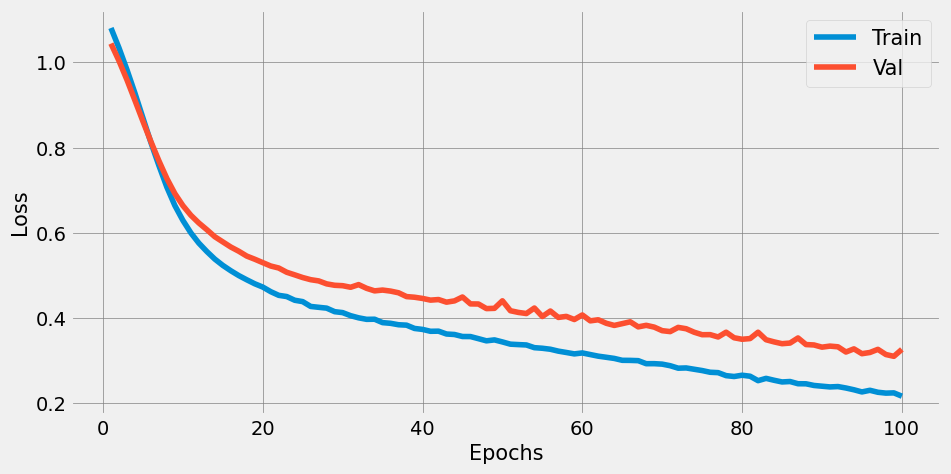

In [16]:
epochs = np.arange(1, n_epochs+1)
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.plot(epochs, bc_sbs.losses, label='Train')
plt.plot(epochs, bc_sbs.val_losses, label='Val')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=15)
plt.grid(linewidth=0.5, color='gray')

In [39]:
bc_sbs.val_losses

[1.0441168049971263,
 1.0037864744663239,
 0.9590659340222677,
 0.9108105103174845,
 0.8617757757504781,
 0.8140189747015635,
 0.7689594229062399,
 0.727341870466868,
 0.6919864416122437,
 0.6639033555984497,
 0.6412392109632492,
 0.623062272866567,
 0.607360819975535,
 0.5908076067765554,
 0.5786872059106827,
 0.566657617688179,
 0.5567326645056406,
 0.5453870395819346,
 0.5380178342262903,
 0.5300388882557551,
 0.522085482875506,
 0.5173819363117218,
 0.5074529151121775,
 0.5013245741526285,
 0.49502886831760406,
 0.48998115956783295,
 0.48711564640204114,
 0.4801697979370753,
 0.4768610546986262,
 0.4759024381637573,
 0.4722086141506831,
 0.4784519523382187,
 0.4697246154149373,
 0.4637441461284955,
 0.4656377583742142,
 0.46319766342639923,
 0.45924858500560123,
 0.4503279874722163,
 0.4487993319829305,
 0.44598058859507245,
 0.44202011823654175,
 0.44338442881902057,
 0.4372444599866867,
 0.4402466764052709,
 0.4494113971789678,
 0.4331720968087514,
 0.4329278419415156,
 0.4221359